# Final Project code 2020.11.09


In [1]:
# Next steps: run descriptives. possible idea. harry potter and the bad machine learning prophacy / buzzfeed quiz. try to get profiles / groupings of Harry, Ron, Hermione etc. 

## 0. Setup 

In [23]:
##Import libraries

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm

import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
##read file into dataframe

filepath = "hsls_17_student_pets_sr_v1_0.csv"

df = pd.read_csv(filepath)

## 1. Prepare data

### a. Select variables of interest

In [4]:
## select variables of interest

#hold off on the following for now "S1HROTHHOMWK", "S1HRSHOMEWK", "S1HRFRIENDS",
#include student weight (W1STUDENT)

mydf = df[["X1TXMTH", "X1SCHOOLBEL", "X1SCHOOLENG", "S1HRACTIVITY", "S1HRWORK", "S1HRVIDEO", "S1HRONLINE", "S1HRTV", "X1SEX", "X1SES", "W1STUDENT"]]
mydf.head()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT
0,0.8304,0.84,-1.41,3,1,1,1,2,1,1.5644,375.667105
1,-0.2956,0.05,-0.20,2,3,1,2,2,2,-0.3699,189.309446
2,1.2997,0.37,1.39,3,1,1,3,1,2,1.2741,143.591863
3,-0.1427,-0.04,-0.20,1,-9,1,2,1,2,0.5498,227.937019
4,1.1405,-2.27,0.33,1,1,4,4,2,1,0.1495,145.019401


In [5]:
mydf.describe()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT
count,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000
mean,-0.669273,-0.930774,-0.859595,1.147045,0.066034,0.384291,0.987406,1.092839,1.487768,-0.651491,175.082326
std,2.453563,2.875348,2.757859,3.799725,3.708576,3.775997,3.870358,3.749629,0.527204,2.395987,232.624665
min,-8.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-8.000000,0.000000
25%,-0.836500,-0.880000,-0.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.666500,45.997977
50%,-0.077400,-0.120000,0.030000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,-0.102700,118.839609
75%,0.639000,0.770000,0.710000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.493850,226.654342
max,3.028300,1.590000,1.390000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,2.880700,5500.479620


### b. in new dataframe change missingvalues to NAN

In [6]:
#change missingvalues to NAN in new dataframe
#remember that adding/ subtracting variables to dataframe will affect final counts
mydf_nan = mydf
mydf_nan.replace(-5,np.nan, inplace = True)
mydf_nan.replace(-7, np.nan, inplace = True)
mydf_nan.replace(-8, np.nan, inplace = True)
mydf_nan.replace(-9, np.nan, inplace = True)

C:\Users\jholmes\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [7]:
mydf_nan.describe()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT
count,21444.000000,20680.000000,20902.000000,20598.000000,19998.000000,20210.000000,20473.000000,20658.000000,23497.000000,21444.000000,23503.000000
mean,0.034605,0.071181,0.054872,2.478153,1.552055,1.811479,2.364968,2.383145,1.490446,0.054094,175.082326
std,0.970760,1.005389,0.987379,1.452316,1.146020,1.415957,1.563320,1.487949,0.499919,0.780304,232.624665
min,-2.575100,-4.350000,-3.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.930200,0.000000
25%,-0.556800,-0.410000,-0.580000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.501150,45.997977
50%,0.021300,-0.040000,0.210000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,-0.010900,118.839609
75%,0.713925,0.850000,0.710000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,0.564800,226.654342
max,3.028300,1.590000,1.390000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,2.880700,5500.479620


In [6]:
mydf.isnull().sum()

X1TXMTH         2059
X1SCHOOLBEL     2823
X1SCHOOLENG     2601
S1HRACTIVITY    2905
S1HRWORK        3505
S1HRVIDEO       3293
S1HRONLINE      3030
S1HRTV          2845
X1SEX              6
X1SES           2059
dtype: int64

In [7]:
mydf_nan.isnull().sum()

X1TXMTH         2059
X1SCHOOLBEL     2823
X1SCHOOLENG     2601
S1HRACTIVITY    2905
S1HRWORK        3505
S1HRVIDEO       3293
S1HRONLINE      3030
S1HRTV          2845
X1SEX              6
X1SES           2059
dtype: int64

In [8]:
mydf.shape

(23503, 11)

In [9]:
mydf_nan.shape

(23503, 11)

### c. create complete case dataset

In [10]:
#create complete case dataset
mydf_cc = mydf_nan
mydf_cc = mydf_nan.dropna()

In [11]:
mydf_cc.shape

(18611, 10)

### d. prepare variables in new dataframe

In [11]:
mydf_cc2 = mydf_cc


In [12]:
#create male & female dummy variables
dummy = pd.get_dummies(mydf_cc["X1SEX"])
dummy.head()
mydf_cc2 = pd.concat([mydf_cc, dummy], axis = 1)
mydf_cc2.head()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT,1.0,2.0
0,0.8304,0.84,-1.41,3.0,1.0,1.0,1.0,2.0,1.0,1.5644,375.667105,1,0
1,-0.2956,0.05,-0.20,2.0,3.0,1.0,2.0,2.0,2.0,-0.3699,189.309446,0,1
2,1.2997,0.37,1.39,3.0,1.0,1.0,3.0,1.0,2.0,1.2741,143.591863,0,1
4,1.1405,-2.27,0.33,1.0,1.0,4.0,4.0,2.0,1.0,0.1495,145.019401,1,0
5,0.7106,-0.52,0.96,4.0,1.0,1.0,1.0,3.0,2.0,1.0639,56.347833,0,1


In [14]:
mydf_cc2=mydf_cc2.rename(columns={1.0:"MALE", 2.0:"FEMALE"})

In [15]:
list(mydf_cc2.columns)

['X1TXMTH',
 'X1SCHOOLBEL',
 'X1SCHOOLENG',
 'S1HRACTIVITY',
 'S1HRWORK',
 'S1HRVIDEO',
 'S1HRONLINE',
 'S1HRTV',
 'X1SEX',
 'X1SES',
 'MALE',
 'FEMALE']

In [13]:
#recode hours variables


mydf_cc2["S1HRACTIVITY"] = mydf_cc2["S1HRACTIVITY"] - 1

mydf_cc2["S1HRACTIVITY"].value_counts()

0.0    6125
2.0    4463
1.0    4296
3.0    1826
5.0    1268
4.0     633
Name: S1HRACTIVITY, dtype: int64

In [17]:
mydf_cc["S1HRACTIVITY"].value_counts()

1.0    6125
3.0    4463
2.0    4296
4.0    1826
6.0    1268
5.0     633
Name: S1HRACTIVITY, dtype: int64

In [14]:
mydf_cc2["S1HRWORK"] = mydf_cc2["S1HRWORK"] - 1


In [19]:
mydf_cc2["S1HRWORK"].value_counts()

0.0    13657
1.0     2527
2.0     1080
5.0      534
3.0      532
4.0      281
Name: S1HRWORK, dtype: int64

In [15]:
mydf_cc2["S1HRWORK"].value_counts()

0.0    13657
1.0     2527
2.0     1080
5.0      534
3.0      532
4.0      281
Name: S1HRWORK, dtype: int64

In [16]:
mydf_cc2.head()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT,1.0,2.0
0,0.8304,0.84,-1.41,2.0,0.0,1.0,1.0,2.0,1.0,1.5644,375.667105,1,0
1,-0.2956,0.05,-0.20,1.0,2.0,1.0,2.0,2.0,2.0,-0.3699,189.309446,0,1
2,1.2997,0.37,1.39,2.0,0.0,1.0,3.0,1.0,2.0,1.2741,143.591863,0,1
4,1.1405,-2.27,0.33,0.0,0.0,4.0,4.0,2.0,1.0,0.1495,145.019401,1,0
5,0.7106,-0.52,0.96,3.0,0.0,1.0,1.0,3.0,2.0,1.0639,56.347833,0,1


In [22]:
mydf_cc2["S1HRWORK"].value_counts()

0.0    13657
1.0     2527
2.0     1080
5.0      534
3.0      532
4.0      281
Name: S1HRWORK, dtype: int64

In [23]:
mydf_cc2["S1HRACTIVITY"].value_counts()

0.0    6125
2.0    4463
1.0    4296
3.0    1826
5.0    1268
4.0     633
Name: S1HRACTIVITY, dtype: int64

In [53]:
mydf_cc2["S1HRVIDEO"] = mydf_cc2["S1HRVIDEO"] - 1

In [54]:
mydf_cc2["S1HRVIDEO"].value_counts()

0.0    12164
1.0     2865
2.0     1328
5.0     1065
3.0      723
4.0      466
Name: S1HRVIDEO, dtype: int64

In [89]:
mydf_cc["S1HRVIDEO"].value_counts()

1.0    12164
2.0     2865
3.0     1328
6.0     1065
4.0      723
5.0      466
Name: S1HRVIDEO, dtype: int64

In [17]:
mydf_cc2["S1HRONLINE"] = mydf_cc2["S1HRONLINE"] - 1

In [51]:
mydf_cc2["S1HRONLINE"].value_counts()

0.0    7273
1.0    4997
2.0    2565
5.0    1558
3.0    1406
4.0     812
Name: S1HRONLINE, dtype: int64

In [18]:
mydf_cc2["S1HRTV"] = mydf_cc2["S1HRTV"] - 1

In [37]:
mydf_cc2["S1HRTV"].value_counts()

0.0    6519
1.0    5532
2.0    2939
3.0    1519
5.0    1342
4.0     760
Name: S1HRTV, dtype: int64

In [19]:
#add together Hrs work + Hrs activity to get productive hours

mydf_cc2["HRPRODUCTIVE"] = mydf_cc2["S1HRWORK"] + mydf_cc2["S1HRACTIVITY"]
mydf_cc2.head()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT,1.0,2.0,HRPRODUCTIVE
0,0.8304,0.84,-1.41,2.0,0.0,1.0,0.0,1.0,1.0,1.5644,375.667105,1,0,2.0
1,-0.2956,0.05,-0.20,1.0,2.0,1.0,1.0,1.0,2.0,-0.3699,189.309446,0,1,3.0
2,1.2997,0.37,1.39,2.0,0.0,1.0,2.0,0.0,2.0,1.2741,143.591863,0,1,2.0
4,1.1405,-2.27,0.33,0.0,0.0,4.0,3.0,1.0,1.0,0.1495,145.019401,1,0,0.0
5,0.7106,-0.52,0.96,3.0,0.0,1.0,0.0,2.0,2.0,1.0639,56.347833,0,1,3.0


In [60]:
mydf_cc2["HRPRODUCTIVE"].value_counts()

0.0     4766
2.0     4371
1.0     3768
3.0     2261
5.0     1379
4.0     1069
6.0      416
7.0      263
8.0      129
10.0     115
9.0       74
Name: HRPRODUCTIVE, dtype: int64

In [20]:
#add together hrs video game + hours online + hours tv to get hours media 
mydf_cc2["HRMEDIA"] = mydf_cc2["S1HRVIDEO"] + mydf_cc2["S1HRONLINE"] + mydf_cc2["S1HRTV"]
mydf_cc2.head()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT,1.0,2.0,HRPRODUCTIVE,HRMEDIA
0,0.8304,0.84,-1.41,2.0,0.0,1.0,0.0,1.0,1.0,1.5644,375.667105,1,0,2.0,2.0
1,-0.2956,0.05,-0.20,1.0,2.0,1.0,1.0,1.0,2.0,-0.3699,189.309446,0,1,3.0,3.0
2,1.2997,0.37,1.39,2.0,0.0,1.0,2.0,0.0,2.0,1.2741,143.591863,0,1,2.0,3.0
4,1.1405,-2.27,0.33,0.0,0.0,4.0,3.0,1.0,1.0,0.1495,145.019401,1,0,0.0,8.0
5,0.7106,-0.52,0.96,3.0,0.0,1.0,0.0,2.0,2.0,1.0639,56.347833,0,1,3.0,3.0


In [61]:
mydf_cc2["HRMEDIA"].value_counts()

2.0     3244
3.0     3150
4.0     2741
5.0     2325
6.0     1582
7.0     1340
8.0     1054
9.0      703
10.0     536
12.0     494
11.0     489
17.0     324
13.0     219
14.0     213
15.0     113
16.0      84
Name: HRMEDIA, dtype: int64

In [21]:
mydf_cc2.describe()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,S1HRVIDEO,S1HRONLINE,S1HRTV,X1SEX,X1SES,W1STUDENT,1.0,2.0,HRPRODUCTIVE,HRMEDIA
count,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000,18611.000000
mean,0.073128,0.075786,0.057127,1.481489,0.541454,1.799473,1.363871,1.381817,1.495084,0.070838,189.704230,0.504916,0.495084,2.022943,4.545161
std,0.961746,1.004426,0.984458,1.458035,1.136204,1.407542,1.559045,1.486692,0.499989,0.778445,227.132844,0.499989,0.499989,1.948162,3.448249
min,-2.575100,-4.350000,-3.380000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.930200,1.815257,0.000000,0.000000,0.000000,1.000000
25%,-0.515350,-0.390000,-0.560000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-0.483350,62.727204,0.000000,0.000000,0.000000,2.000000
50%,0.053800,-0.040000,0.210000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.006400,136.264156,1.000000,0.000000,2.000000,4.000000
75%,0.744550,0.900000,0.710000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.578700,236.356675,1.000000,1.000000,3.000000,6.000000
max,3.028300,1.590000,1.390000,5.000000,5.000000,6.000000,5.000000,5.000000,2.000000,2.880700,5500.479620,1.000000,1.000000,10.000000,16.000000


In [65]:
#create extracurricular activites and work binary variables
mydf_cc2["EXTRA_B"] = np.where(mydf_cc2["S1HRACTIVITY"] >= 1, 1,0)

In [22]:
pd.crosstab(mydf_cc2.EXTRA_B,mydf_cc2.S1HRACTIVITY)

AttributeError: 'DataFrame' object has no attribute 'EXTRA_B'

In [67]:
mydf_cc2["WORK_B"] = np.where(mydf_cc2["S1HRWORK"] >= 1, 1,0)

In [ ]:
pd.crosstab(mydf_cc2.WORK_B,mydf_cc2.S1HRWORK)

In [ ]:
#mydf_cc2["FOURYR"] = np.where(mydf_cc2["X4PSENRSTLV"] == 1 | mydf_cc2["X4ATPRLVLA"] == 1)

## 2. Descriptive Statistics

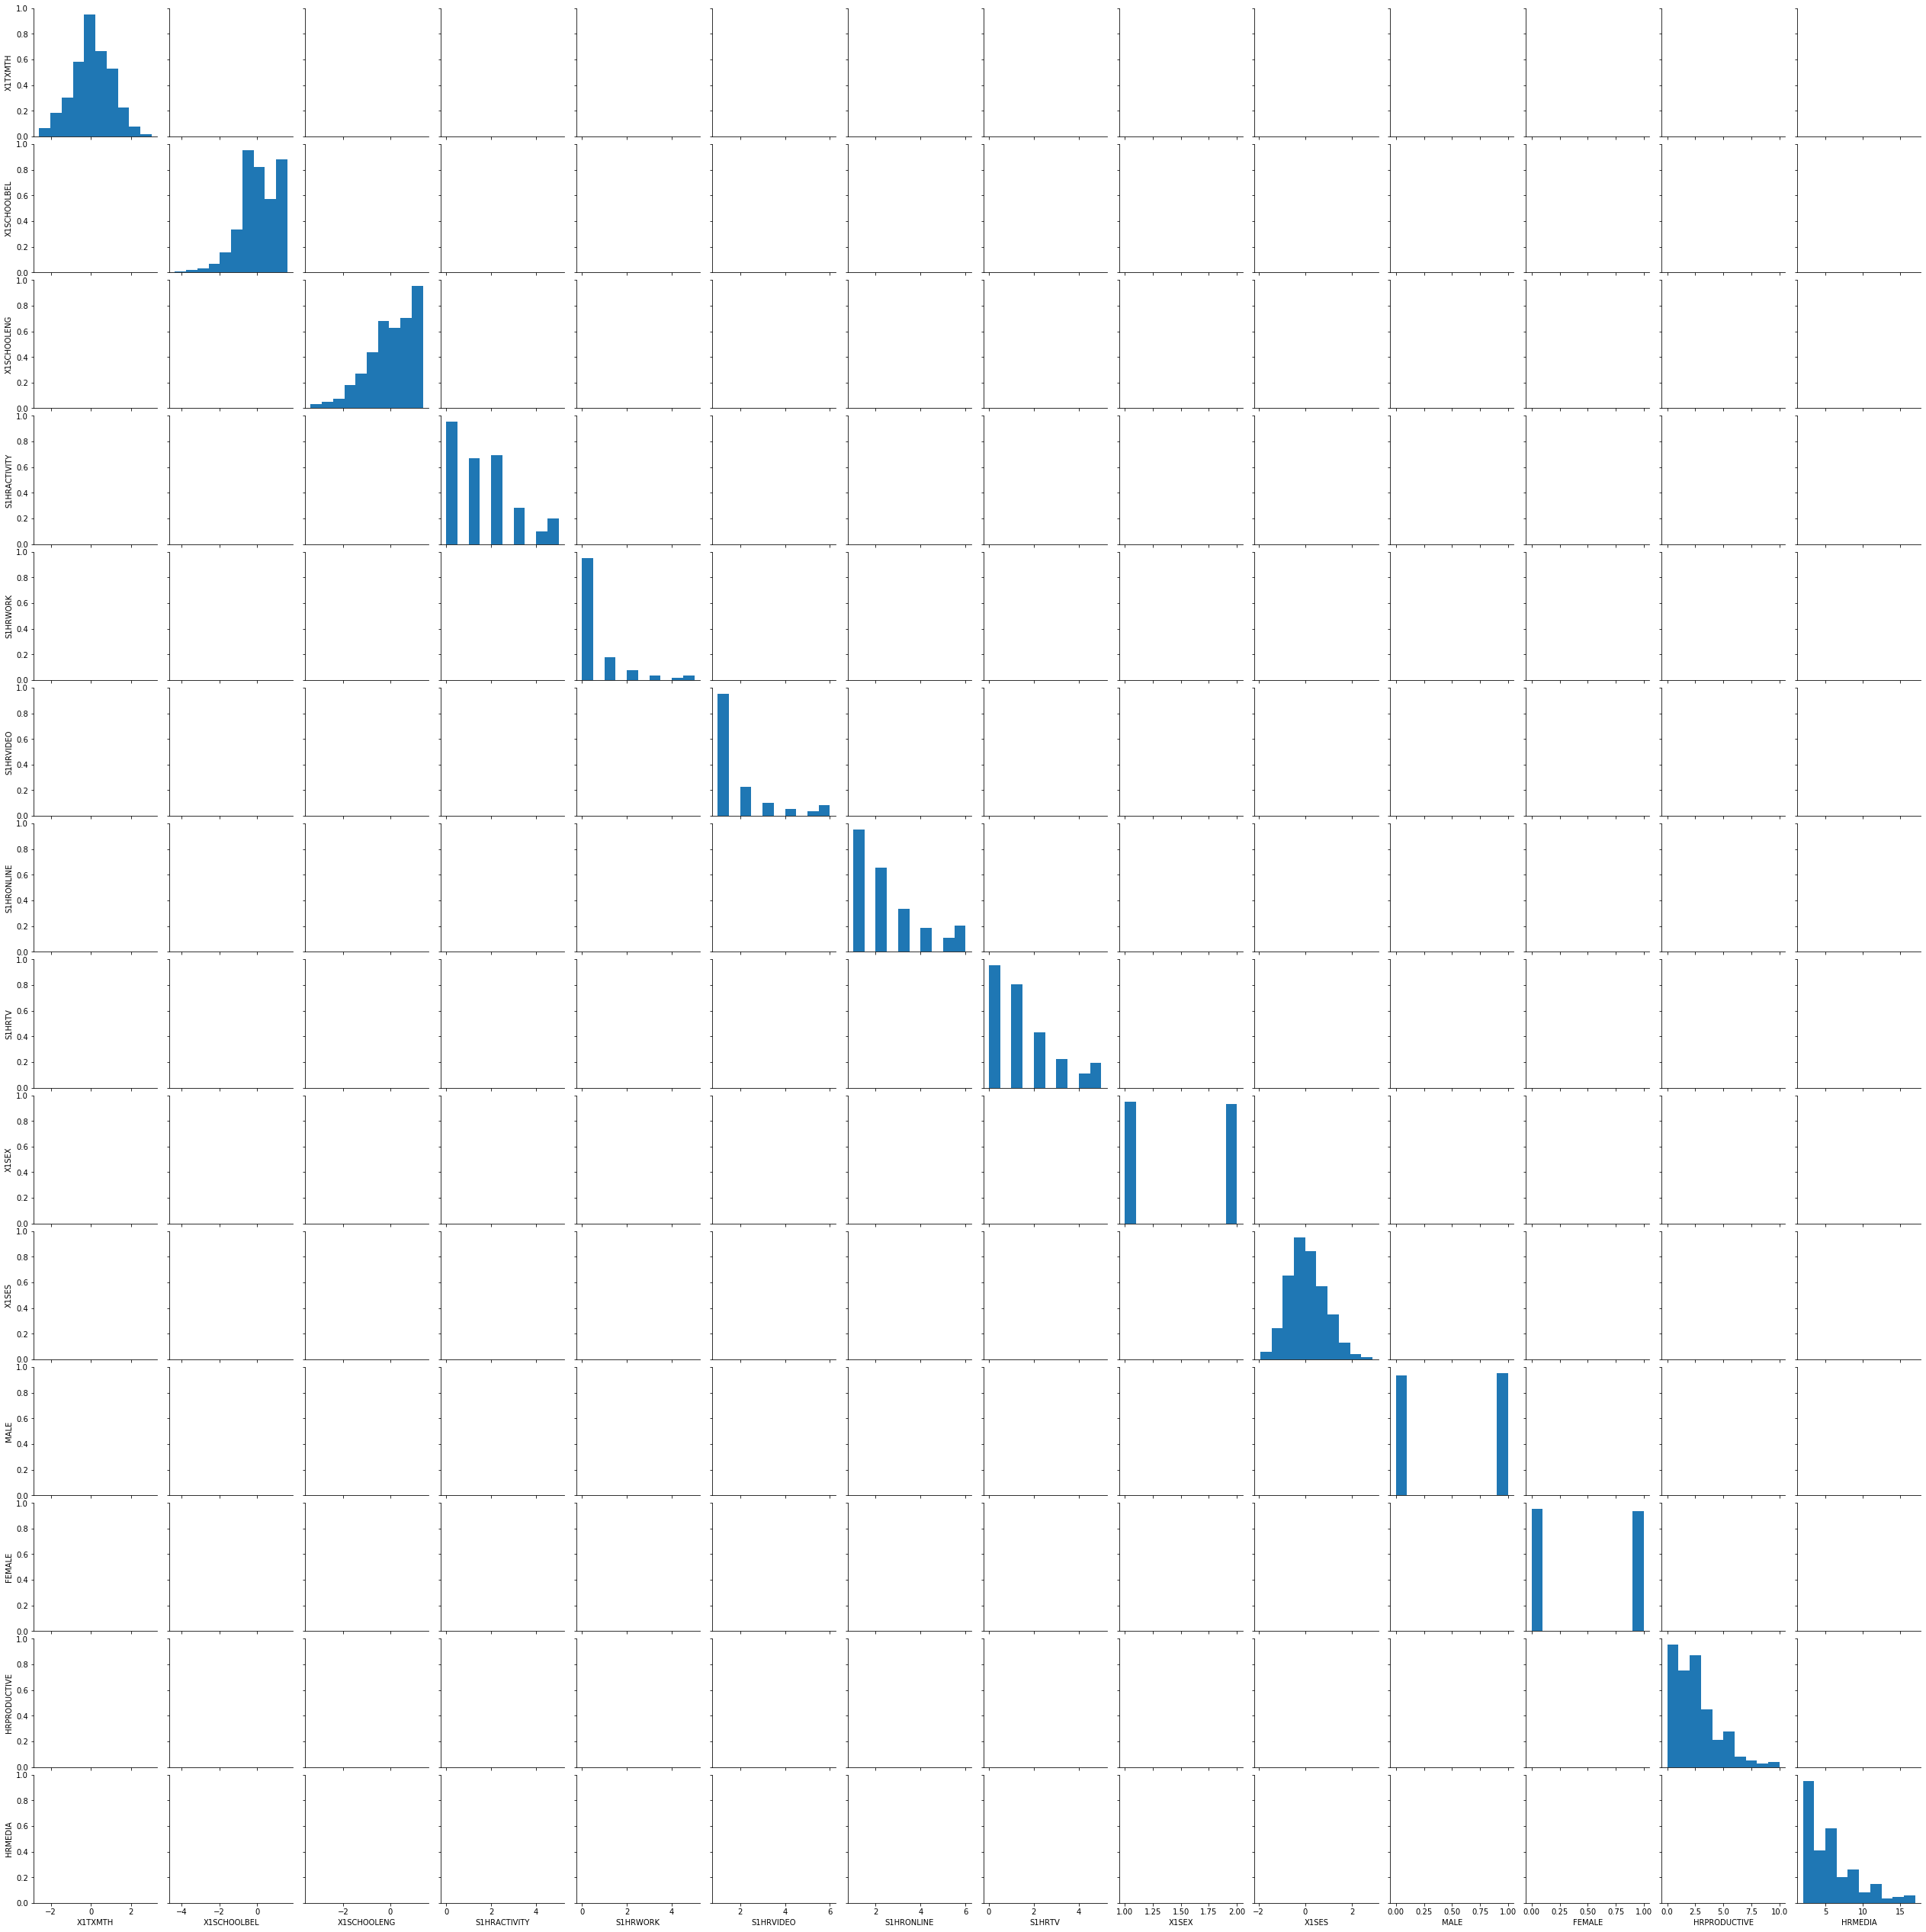

In [41]:
sns.pairplot(mydf_cc2, kind = "hist")

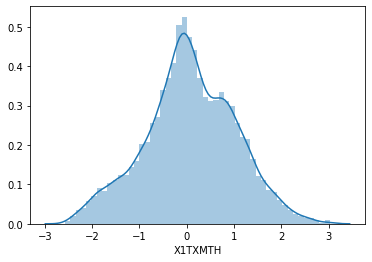

In [28]:
sns.distplot(mydf_cc2["X1TXMTH"])

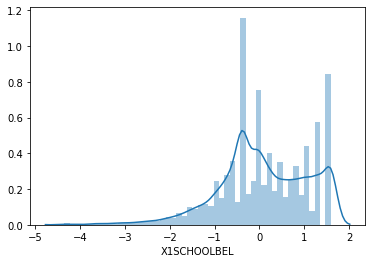

In [29]:
sns.distplot(mydf_cc2["X1SCHOOLBEL"])

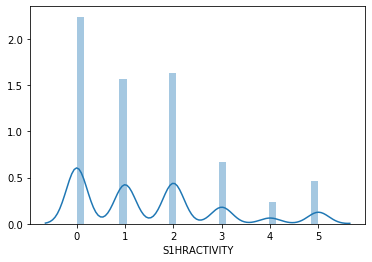

In [31]:
sns.distplot(mydf_cc2["S1HRACTIVITY"])

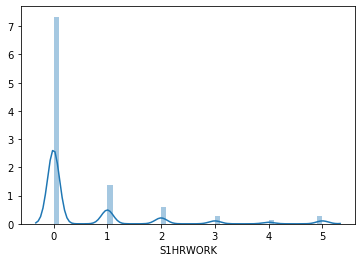

In [32]:
sns.distplot(mydf_cc2["S1HRWORK"])

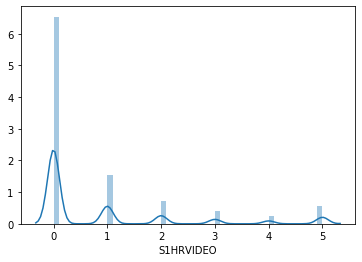

In [56]:
sns.distplot(mydf_cc2["S1HRVIDEO"])

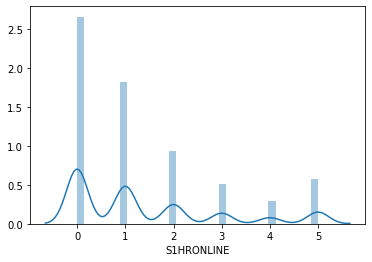

In [55]:
sns.distplot(mydf_cc2["S1HRONLINE"])

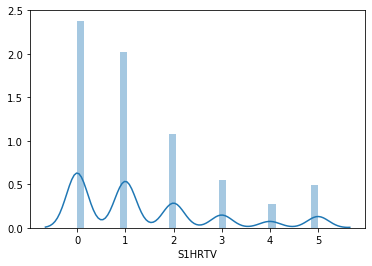

In [48]:
sns.distplot(mydf_cc2["S1HRTV"])

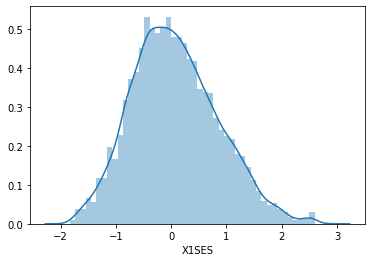

In [57]:
sns.distplot(mydf_cc2["X1SES"])

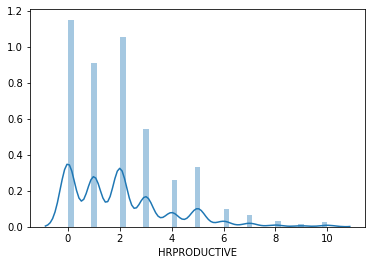

In [58]:
sns.distplot(mydf_cc2["HRPRODUCTIVE"])

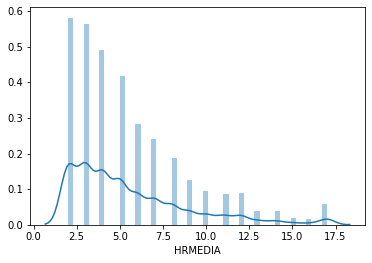

In [59]:
sns.distplot(mydf_cc2["HRMEDIA"])

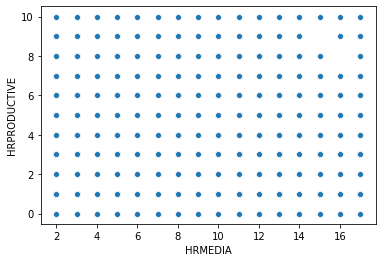

In [62]:
sns.scatterplot(data = mydf_cc2, x = "HRMEDIA" , y = "HRPRODUCTIVE")

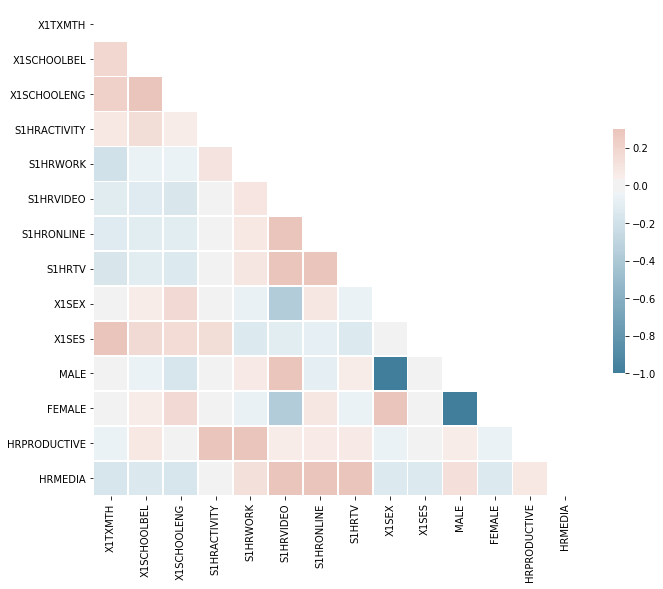

In [64]:
corr = mydf_cc2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 3. Create dataframes for # cluster testing

### a. df A

In [25]:
A = mydf_cc2[["X1TXMTH","X1SCHOOLBEL","X1SCHOOLENG","S1HRACTIVITY", "S1HRWORK"]]

In [26]:
A.head()

,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK
0,0.8304,0.84,-1.41,2.0,0.0
1,-0.2956,0.05,-0.20,1.0,2.0
2,1.2997,0.37,1.39,2.0,0.0
4,1.1405,-2.27,0.33,0.0,0.0
5,0.7106,-0.52,0.96,3.0,0.0


In [28]:
A_prime = A
A_prime["W1STUDENT"] =  mydf_cc2[["W1STUDENT"]]
A_prime.head()

C:\Users\jholmes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,W1STUDENT
0,0.8304,0.84,-1.41,2.0,0.0,375.667105
1,-0.2956,0.05,-0.20,1.0,2.0,189.309446
2,1.2997,0.37,1.39,2.0,0.0,143.591863
4,1.1405,-2.27,0.33,0.0,0.0,145.019401
5,0.7106,-0.52,0.96,3.0,0.0,56.347833


A.head()

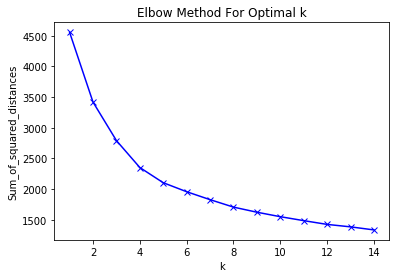

In [33]:
# using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features
mms = MinMaxScaler()
mms.fit(A)
A_transformed = mms.transform(A)

#For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(A_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

([<matplotlib.axis.XTick at 0x22bdc6d8088>,
 <a list of 5 Text xticklabel objects>)

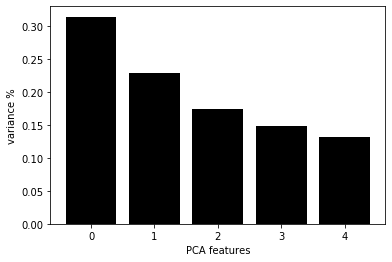

In [31]:
# Standardize the data to have a mean of ~0 and a variance of 1
A_std = StandardScaler().fit_transform(A)

# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(A_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

### b. df b

In [60]:
B = mydf_cc2[["X1TXMTH","X1SCHOOLBEL","X1SCHOOLENG","HRPRODUCTIVE"]]

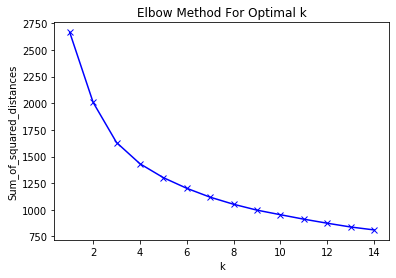

In [61]:
# using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features
mms = MinMaxScaler()
mms.fit(B)
B_transformed = mms.transform(B)

#For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(B_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

([<matplotlib.axis.XTick at 0x22b8dd1a488>,
 <a list of 4 Text xticklabel objects>)

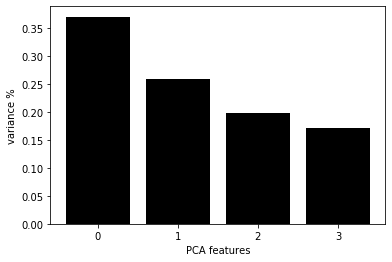

In [57]:
# Standardize the data to have a mean of ~0 and a variance of 1
B_std = StandardScaler().fit_transform(B)

# Create a PCA instance: pca
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(B_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

### c. DF C

In [98]:
C = mydf_cc2[["X1TXMTH","X1SCHOOLBEL","X1SCHOOLENG","HRPRODUCTIVE", "HRMEDIA"]]

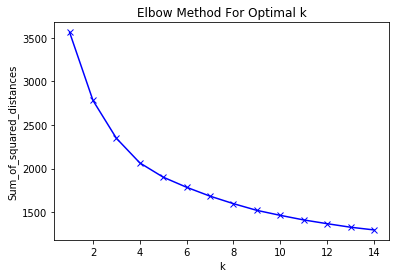

In [99]:
# using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features
mms = MinMaxScaler()
mms.fit(C)
C_transformed = mms.transform(C)

#For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(C_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

([<matplotlib.axis.XTick at 0x22b85b81a88>,
 <a list of 5 Text xticklabel objects>)

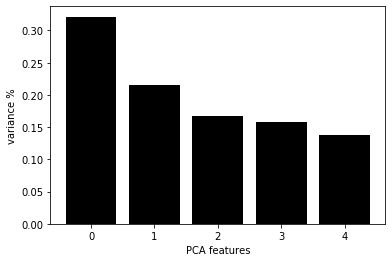

In [101]:
# Standardize the data to have a mean of ~0 and a variance of 1
C_std = StandardScaler().fit_transform(C)

# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(C_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

### d. DF D

In [106]:
D = mydf_cc2[["X1TXMTH","X1SCHOOLENG","HRPRODUCTIVE", "HRMEDIA"]]

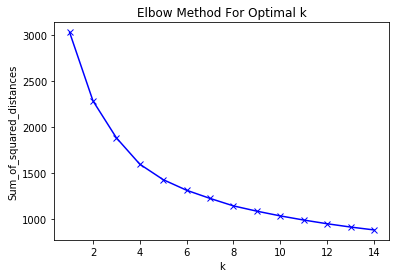

In [107]:
# using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features
mms = MinMaxScaler()
mms.fit(D)
D_transformed = mms.transform(D)

#For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(D_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

([<matplotlib.axis.XTick at 0x22b97501fc8>,
 <a list of 4 Text xticklabel objects>)

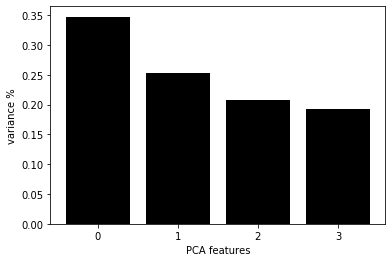

In [109]:
# Standardize the data to have a mean of ~0 and a variance of 1
D_std = StandardScaler().fit_transform(D)

# Create a PCA instance: pca
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(D_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

### e. DF E

In [121]:
E = mydf_cc2[["X1SCHOOLENG","HRPRODUCTIVE", "HRMEDIA"]]

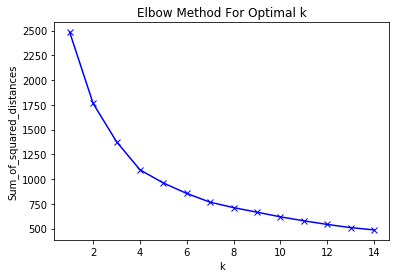

In [122]:
# using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features
mms = MinMaxScaler()
mms.fit(E)
E_transformed = mms.transform(E)

#For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(E_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

([<matplotlib.axis.XTick at 0x22ba67f6bc8>,
 <a list of 3 Text xticklabel objects>)

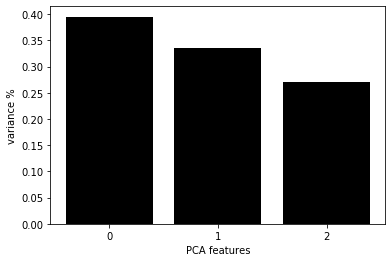

In [124]:
# Standardize the data to have a mean of ~0 and a variance of 1
E_std = StandardScaler().fit_transform(E)

# Create a PCA instance: pca
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(E_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
## 4. define weight variable

WEIGHT =

##### 5. K means Analysis

### a. DF A

In [ ]:
#test with survey weights
# initialize KMeans to create x clusters
kmeans = KMeans(n_clusters = 2)

# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(A, sample_weight = )

# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(
kmeans.cluster_centers_

In [51]:
# initialize KMeans to create x clusters
kmeans = KMeans(n_clusters = 2)

# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(A)

# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(
kmeans.cluster_centers_


array([[ 0.33534485,  0.41574191,  0.40229571,  1.78487585,  0.30812641,
         0.14379233],
       [-0.54579352, -0.69440386, -0.72512261,  0.79333672,  1.06849315,
         1.9489261 ]])

In [49]:
# create column in original dataframe with cluster group number
A2 = A
A2['cluster'] = kmeans.labels_
A2.head()

C:\Users\jholmes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,S1HRACTIVITY,S1HRWORK,cluster
0,0.8304,0.84,-1.41,2.0,0.0,0
1,-0.2956,0.05,-0.20,1.0,2.0,2
2,1.2997,0.37,1.39,2.0,0.0,0
4,1.1405,-2.27,0.33,0.0,0.0,2
5,0.7106,-0.52,0.96,3.0,0.0,0


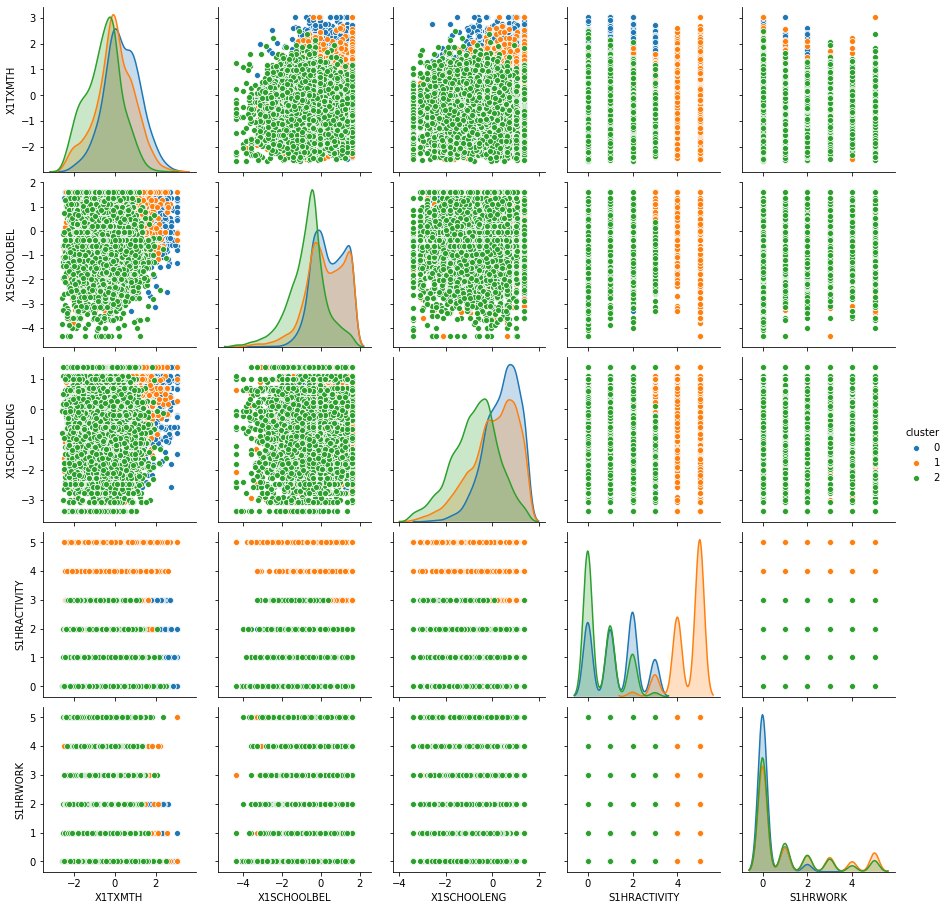

In [50]:
sns.pairplot(data=A2, hue='cluster', diag_kws={'bw': 0.2})

## b. DF B

In [62]:
# initialize KMeans to create x clusters
kmeans = KMeans(n_clusters = 3)

# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(B)

# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(
kmeans.cluster_centers_


array([[-1.25156759e-01,  1.01778846e-01,  1.25000000e-03,
         5.33003394e+00],
       [-3.45480805e-01, -5.47187544e-01, -4.85478459e-01,
         7.14062278e-01],
       [ 4.75072597e-01,  5.68413250e-01,  5.17582812e-01,
         1.73222145e+00]])

In [64]:
# create column in original dataframe with cluster group number
B2 = B
B2['cluster'] = kmeans.labels_
B2.head()

C:\Users\jholmes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,HRPRODUCTIVE,cluster
0,0.8304,0.84,-1.41,2.0,2
1,-0.2956,0.05,-0.20,3.0,2
2,1.2997,0.37,1.39,2.0,2
4,1.1405,-2.27,0.33,0.0,1
5,0.7106,-0.52,0.96,3.0,2


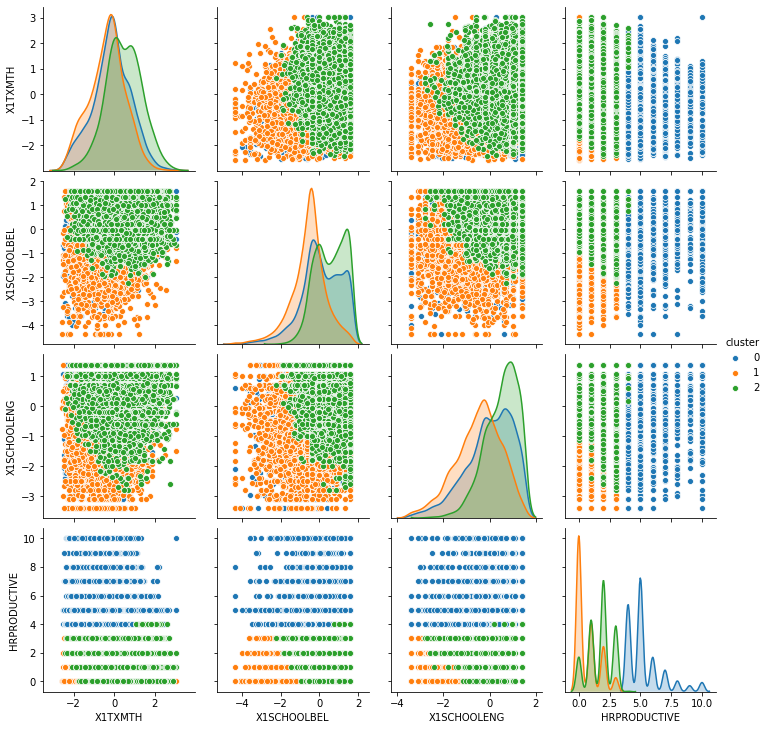

In [66]:
sns.pairplot(data=B2, hue='cluster', diag_kws={'bw': 0.2})

### c. DF C

In [102]:
# initialize KMeans to create x clusters
kmeans = KMeans(n_clusters = 3)

# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(C)

# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(
kmeans.cluster_centers_


array([[-0.06216035, -0.02543205, -0.06785424,  2.01063213,  5.45234873],
       [ 0.1953287 ,  0.17274354,  0.17242144,  1.93496858,  1.36129539],
       [-0.28009506, -0.22045409, -0.2830777 ,  2.56357215, 11.19021191]])

In [103]:
C2 = C
C2['cluster'] = kmeans.labels_
C2.head()

C:\Users\jholmes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X1TXMTH,X1SCHOOLBEL,X1SCHOOLENG,HRPRODUCTIVE,HRMEDIA,cluster
0,0.8304,0.84,-1.41,2.0,1.0,1
1,-0.2956,0.05,-0.20,3.0,2.0,1
2,1.2997,0.37,1.39,2.0,2.0,1
4,1.1405,-2.27,0.33,0.0,7.0,0
5,0.7106,-0.52,0.96,3.0,2.0,1


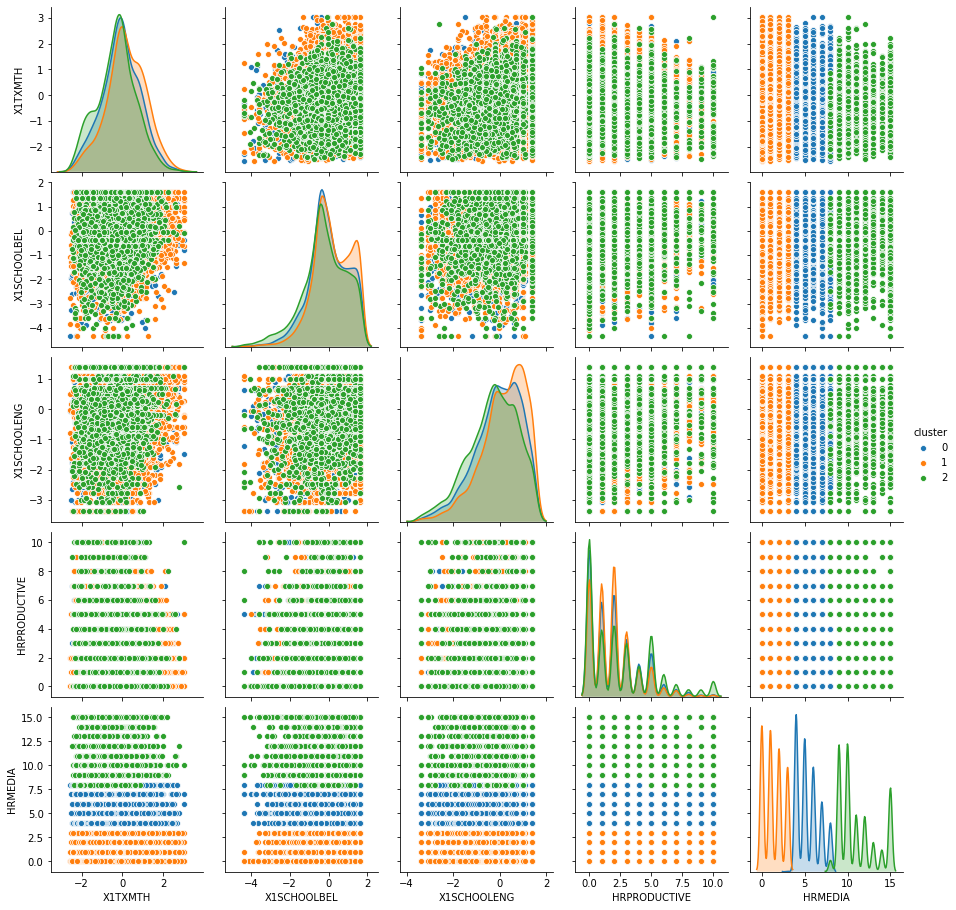

In [104]:
sns.pairplot(data=C2, hue='cluster', diag_kws={'bw': 0.2})

### d. DF D

In [116]:
# initialize KMeans to create x clusters
kmeans = KMeans(n_clusters = 2)

# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(D)

# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(
kmeans.cluster_centers_


array([[ 0.17853921,  0.15144993,  1.94947094,  1.68187395,  0.24260083],
       [-0.17373437, -0.16376728,  2.19500808,  7.90878075,  1.64320345]])

In [117]:
D2 = D
D2['cluster'] = kmeans.labels_
D2.head()

C:\Users\jholmes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X1TXMTH,X1SCHOOLENG,HRPRODUCTIVE,HRMEDIA,cluster
0,0.8304,-1.41,2.0,1.0,0
1,-0.2956,-0.20,3.0,2.0,0
2,1.2997,1.39,2.0,2.0,0
4,1.1405,0.33,0.0,7.0,1
5,0.7106,0.96,3.0,2.0,0


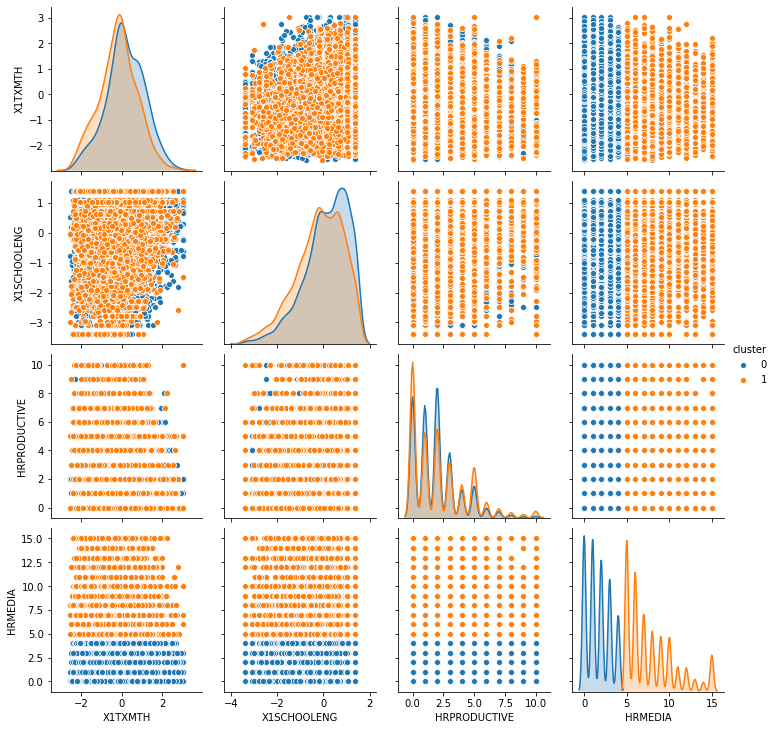

In [118]:
sns.pairplot(data=D2, hue='cluster', diag_kws={'bw': 0.2})

### e. DF E

In [125]:
# initialize KMeans to create x clusters
kmeans = KMeans(n_clusters = 3)

# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(E)

# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(
kmeans.cluster_centers_

array([[ 0.17131152,  1.93577661,  1.36186736],
       [-0.27651175,  2.52757916, 11.22931563],
       [-0.06906027,  2.0250337 ,  5.46601194]])

In [126]:
E2 = E
E2['cluster'] = kmeans.labels_
E2.head()

C:\Users\jholmes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X1SCHOOLENG,HRPRODUCTIVE,HRMEDIA,cluster
0,-1.41,2.0,1.0,0
1,-0.20,3.0,2.0,0
2,1.39,2.0,2.0,0
4,0.33,0.0,7.0,2
5,0.96,3.0,2.0,0


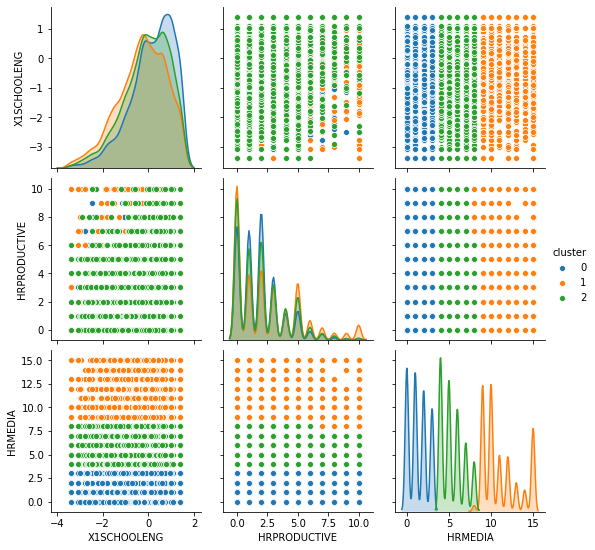

In [127]:
sns.pairplot(data=E2, hue='cluster', diag_kws={'bw': 0.2})

In [129]:
E2["cluster"].value_counts()

0    11460
2     5191
1     1960
Name: cluster, dtype: int64

In [ ]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=20)
principalcomponents=pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalcomponents)

plt.scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
X = mydf5[["X1TXMTH", "X1SCHOOLBEL", "X1SCHOOLENG"]]
X.head()

In [ ]:
# initialize KMeans to create 3 clusters
kmeans = KMeans(n_clusters = 3)

In [ ]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(X)

In [ ]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(
kmeans.cluster_centers_

In [ ]:
# create column in original dataframe with cluster group number
X2=X
X2['cluster'] = kmeans.labels_
X2.head()

In [ ]:
# compare all numerical features by cluster group
sns.pairplot(data=X2, hue="cluster")

In [ ]:
Y = mydf5[["X1TXMTH", "X1SCHOOLENG"]]
Y.head()

In [ ]:
mms = MinMaxScaler()
mms.fit(Y)
Y_transformed = mms.transform(Y)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Y_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# initialize KMeans to create 3 clusters
kmeans = KMeans(n_clusters=4)

In [ ]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(Y)

In [ ]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index
kmeans.cluster_centers_

In [ ]:
Y['cluster'] = kmeans.labels_
Y.head()

In [ ]:
# compare all numerical features by cluster group
sns.pairplot(data=Y, hue='cluster')